In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import math as mt
import scipy.stats as ss  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import auc,roc_curve,accuracy_score,precision_score,recall_score,accuracy_score,f1_score,fbeta_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
%autosave 5

Autosaving every 5 seconds


In [2]:
# Loading the dataset
df = pd.read_csv('cleaned_data.csv')
print(df.shape)

(29685, 25)


In [3]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2.0,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1.0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [4]:
df.drop(columns=['ID'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29685 non-null  int64  
 1   SEX                         29685 non-null  int64  
 2   EDUCATION                   29685 non-null  int64  
 3   MARRIAGE                    29685 non-null  int64  
 4   AGE                         29685 non-null  int64  
 5   PAY_1                       26664 non-null  float64
 6   PAY_2                       29685 non-null  int64  
 7   PAY_3                       29685 non-null  int64  
 8   PAY_4                       29685 non-null  int64  
 9   PAY_5                       29685 non-null  int64  
 10  PAY_6                       29685 non-null  int64  
 11  BILL_AMT1                   29685 non-null  int64  
 12  BILL_AMT2                   29685 non-null  int64  
 13  BILL_AMT3                   296

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(20779, 23) (8906, 23)
(20779,) (8906,)


In [7]:
model_perf = {}
def Store(x,f,a):
    if x==0 and f==0 and a==0:
        print(model_perf)
    else:
        model_perf[x] = [f,a]

## Logistic Regression

In [8]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [9]:
Feat_PAY = ['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
Feat_Bil_Am = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
Feat_Pay_Am = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Feat_Other = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']

**With all variable**

In [10]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
lr = LogisticRegression(random_state = 42,warm_start=True)
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',lr)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()), ('scaler', RobustScaler()),
                ('transformer', PowerTransformer()),
                ('model',
                 LogisticRegression(random_state=42, warm_start=True))])

In [11]:
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
results = cross_val_score(pipeline, X_train, y_train,scoring='f1', cv=kfold,verbose=4,n_jobs=-1)
results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.0s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.8s finished


array([0.31683168, 0.30642504, 0.29848229, 0.30990686, 0.34664537])

In [12]:
results.mean()

0.3156582487568603

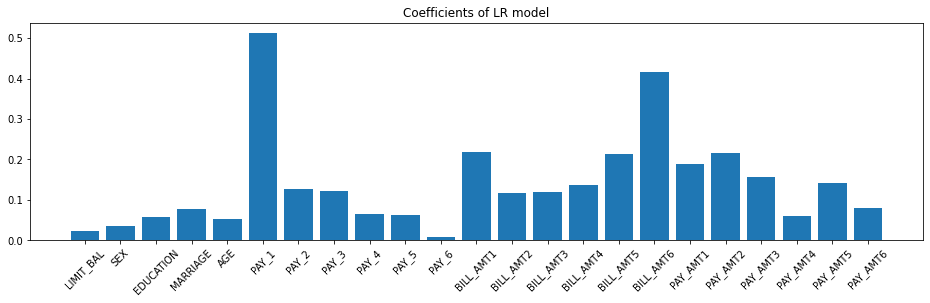

In [13]:
plt.figure(figsize=(16,4))
plt.bar(X_train.columns,abs(pipeline.named_steps.model.coef_[0]))
plt.title('Coefficients of LR model')
plt.xticks(rotation=45)
# plt.hlines(0.05,-1,23,color='r',label='0.05 Line')
# plt.legend()
plt.show()

**testing the individual effect**

In [14]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
trans_X_train = imp.fit_transform(X_train)
scl_X_Trn = scale.fit_transform(trans_X_train)
trns = transform.fit_transform(scl_X_Trn)
XX_train = pd.DataFrame(trns,columns=X_train.columns)

In [15]:
from sklearn.feature_selection import f_classif
(f_,p_val) = f_classif(XX_train,y_train)
ind_pred_P_val = pd.DataFrame([X_train.columns,p_val,f_],index=['Predictor','P_val','F-stat']).T
ind_pred_P_val

,Predictor,P_val,F-stat
0,LIMIT_BAL,0.0,596.43546
1,SEX,0.0,30.69472
2,EDUCATION,0.0,32.569367
3,MARRIAGE,0.000899,11.027596
4,AGE,0.961756,0.002299
5,PAY_1,0.0,1884.386533
6,PAY_2,0.0,1147.108764
7,PAY_3,0.0,939.280763
8,PAY_4,0.0,746.499112
9,PAY_5,0.0,620.943075


In [16]:
ind_pred_P_val.query('P_val > 0.05')

,Predictor,P_val,F-stat
4,AGE,0.961756,0.002299
14,BILL_AMT4,0.100237,2.702011
15,BILL_AMT5,0.353264,0.861736
16,BILL_AMT6,0.727104,0.121791


In [17]:
# from statsmodels.api import Logit
# X = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(XX_train)
# y = y_train.reset_index(drop=True)
# model = Logit(y,X)
# res = model.fit()
# res.summary()

In [18]:
# res.pvalues[round(res.pvalues,3) > 0.05]

In [19]:
cols = list(XX_train.columns)
r = list(ind_pred_P_val.query('P_val > 0.05')['Predictor'])
use_ = [i for i in cols if i not in r]
use_

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

## Grid Search

## 1

In [20]:
X = XX_train[use_]
y = y_train
model = LogisticRegression()
param = {'penalty':['l2'],'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
        'C':[0.1,0.01,0.001,0.0001]}
cv = GridSearchCV(model,param,n_jobs=-1,verbose=3)
res = cv.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [21]:
res.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

**Fitting**

In [22]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
lr = LogisticRegression(C=0.1, solver='newton-cg',random_state = 42,warm_start=True)
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',lr)])
pipeline.fit(X_train[use_], y_train)

Pipeline(steps=[('impute', KNNImputer()), ('scaler', RobustScaler()),
                ('transformer', PowerTransformer()),
                ('model',
                 LogisticRegression(C=0.1, random_state=42, solver='newton-cg',
                                    warm_start=True))])

In [23]:
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
results = cross_val_score(pipeline, X_train[use_], y_train,scoring='f1', cv=kfold,verbose=4,n_jobs=-1)
results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.5s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.2s finished


array([0.31239669, 0.30730897, 0.28595745, 0.31481481, 0.32786885])

In [24]:
results.mean()

0.30966935567937715

**Test Prediction**

In [25]:
test_pred = pipeline.predict(X_test[use_])

In [26]:
f1_score(y_test,test_pred)

0.31611650485436893

In [27]:
pred_prob = pipeline.predict_proba(X_test[use_])
fpr,tpr,thresh = roc_curve(y_test.values,pred_prob[:,1],drop_intermediate=False)
auc(fpr,tpr)

0.7358860155679575

## 2

In [28]:
model = LogisticRegression()
param = {'penalty':['elasticnet'],'solver':['saga'],
        'l1_ratio':[1,0.5,0.1,0.01,0.001,0.0001,0.00001,0]}
cv = GridSearchCV(model,param,n_jobs=-1,verbose=3)
res = cv.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [29]:
res.best_estimator_

LogisticRegression(l1_ratio=0.01, penalty='elasticnet', solver='saga')

**Fitting**

In [30]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
lr = LogisticRegression(l1_ratio=0.01, penalty='elasticnet', solver='saga',random_state = 42,warm_start=True)
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',lr)])
pipeline.fit(X_train[use_], y_train)
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
results = cross_val_score(pipeline, X_train[use_], y_train,scoring='f1', cv=kfold,verbose=4,n_jobs=-1)
results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.8s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.0s finished


array([0.31213873, 0.30871369, 0.28741497, 0.31738035, 0.32923833])

In [31]:
results.mean()

0.3109772138278635

**Test Prediction**

In [32]:
test_pred = pipeline.predict(X_test[use_])

In [33]:
f1_score(y_test,test_pred)

0.3180760279286268

In [34]:
pred_prob = pipeline.predict_proba(X_test[use_])
fpr,tpr,thresh = roc_curve(y_test.values,pred_prob[:,1],drop_intermediate=False)
auc(fpr,tpr)

0.735927892862652

## 3

In [35]:
model = LogisticRegression()
param = {'penalty':['l1','l2'],'solver':['liblinear' , 'saga'],
        'C':[0.1,0.01,0.001,0.0001]}
cv = GridSearchCV(model,param,n_jobs=-1,verbose=3)
res = cv.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [36]:
res.best_estimator_

LogisticRegression(C=0.001, solver='liblinear')

**Fitting**

In [37]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
lr = LogisticRegression(C=0.001, solver='liblinear',penalty='l2',random_state = 42,warm_start=True)
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',lr)])
pipeline.fit(X_train[use_], y_train)
kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)
results = cross_val_score(pipeline, X_train[use_], y_train,scoring='f1', cv=kfold,verbose=4,n_jobs=-1)
results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.9s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished


array([0.33036437, 0.32064777, 0.319202  , 0.31631799, 0.3344    ])

In [38]:
results.mean()

0.3241864264786512

**Test Prediction**

In [39]:
test_pred = pipeline.predict(X_test[use_])

In [40]:
f1_score(y_test,test_pred)

0.32707774798927614

**ROC**

In [41]:
pred_prob = pipeline.predict_proba(X_test[use_])
fpr,tpr,thresh = roc_curve(y_test.values,pred_prob[:,1],drop_intermediate=False)
roc_auc = auc(fpr,tpr)

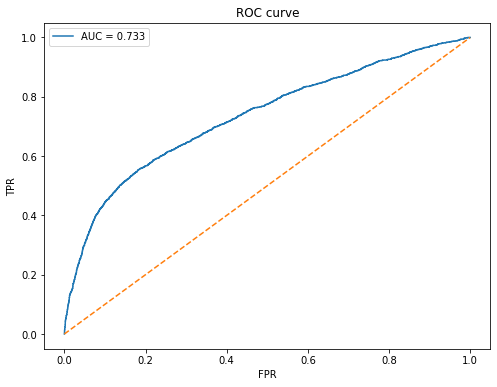

In [42]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='AUC = %0.3f'%roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

In [43]:
def Scores(true,pred):
    print('Accuracy\t: ',accuracy_score(true,pred))
    print('Precision\t: ',precision_score(true,pred))
    print('Recall\t\t: ',recall_score(true,pred))
    print('F1 Score\t: ',f1_score(true,pred))
    t = pd.crosstab(true,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    return t

In [44]:
Scores(test_pred,y_test)

Accuracy	:  0.8027172692566809
Precision	:  0.21686135093956324
Recall		:  0.6651090342679128
F1 Score	:  0.32707774798927614


Predicted,0,1,All
Actual,,,
0,6722,1542,8264
1,215,427,642
All,6937,1969,8906


In [45]:
Store('LR', 0.32707774798927614,0.8027172692566809)

## KNN Classifier

In [46]:
knn = KNeighborsClassifier()
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',knn)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()), ('scaler', RobustScaler()),
                ('transformer', PowerTransformer()),
                ('model', KNeighborsClassifier())])

In [47]:
pred_test3 = pipeline.predict(X_test)
Scores(y_test, pred_test3)

Accuracy	:  0.7893554906804402
Precision	:  0.5371109337589784
Recall		:  0.3417978669375317
F1 Score	:  0.4177529484792054


Predicted,0,1,All
Actual,,,
0,6357,580,6937
1,1296,673,1969
All,7653,1253,8906


### Grid Search

## 1

In [48]:
# imp = KNNImputer()
# scale = RobustScaler()
# transform = PowerTransformer(method='yeo-johnson')
# knn = KNeighborsClassifier(n_jobs=-1)
# pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',knn)])

In [49]:
# param = {'model__n_neighbors': range(3,22,2),
#          'model__weights' : ['uniform', 'distance'],
#          'model__p' : [2]
#         }
# kfold = StratifiedKFold(n_splits=3, shuffle = True, random_state=42)
# clf = GridSearchCV(pipeline, param, cv=kfold ,verbose=2,scoring='f1')
# clf = clf.fit(X_train, y_train)

In [50]:
# clf.best_params_

In [51]:
# clf.best_score_

In [52]:
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1,weights='distance',p=2)
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',knn)])
pipeline.fit(X_train, y_train)
pred_test4 = pipeline.predict(X_test)
Scores(y_test, pred_test4)

Accuracy	:  0.7899169099483494
Precision	:  0.5388888888888889
Recall		:  0.3448450990350432
F1 Score	:  0.4205636419944255


Predicted,0,1,All
Actual,,,
0,6356,581,6937
1,1290,679,1969
All,7646,1260,8906


In [53]:
Store('KNN',0.4205636419944255,0.7899169099483494)

## LDA classifier

In [54]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
lda = LinearDiscriminantAnalysis()
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',lda)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()), ('scaler', RobustScaler()),
                ('transformer', PowerTransformer()),
                ('model', LinearDiscriminantAnalysis())])

In [55]:
pred_test4 = pipeline.predict(X_test)
Scores(y_test, pred_test4)

Accuracy	:  0.8023804176959354
Precision	:  0.6552748885586924
Recall		:  0.22397155916708988
F1 Score	:  0.33383800151400456


Predicted,0,1,All
Actual,,,
0,6705,232,6937
1,1528,441,1969
All,8233,673,8906


In [56]:
Store('LDA',0.33383800151400456,0.8023804176959354)

## QDA Classifier

In [57]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
qda = QuadraticDiscriminantAnalysis()
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',qda)])
pipeline.fit(X_train, y_train)
pred_test4 = pipeline.predict(X_test)
Scores(y_test, pred_test4)

Accuracy	:  0.6870649000673703
Precision	:  0.38253877082136706
Recall		:  0.6764855256475368
F1 Score	:  0.48871766648321413


Predicted,0,1,All
Actual,,,
0,4787,2150,6937
1,637,1332,1969
All,5424,3482,8906


In [58]:
Store('QDA',0.48871766648321413,0.6870649000673703)

# Decision Tree Classifier

In [59]:
imp = KNNImputer()
dt = DecisionTreeClassifier()
pipeline = Pipeline([('impute',imp),('model',dt)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()), ('model', DecisionTreeClassifier())])

In [60]:
pred_test5 = pipeline.predict(X_test)
Scores(y_test, pred_test5)

Accuracy	:  0.7207500561419268
Precision	:  0.37885874649204865
Recall		:  0.41137633316404265
F1 Score	:  0.3944485025566106


Predicted,0,1,All
Actual,,,
0,5609,1328,6937
1,1159,810,1969
All,6768,2138,8906


## GridSearch

In [61]:
imp = KNNImputer()
dt = DecisionTreeClassifier(random_state=42)
pipeline = Pipeline([('impute',imp),('model',dt)])

In [62]:
param = {'model__splitter':["best", "random"],
         'model__criterion':["gini", "entropy"],
         'model__max_depth':range(5,16),
         'model__class_weight':[None,'balanced']}

In [63]:
# clf = GridSearchCV(pipeline,param,scoring='f1',cv=3,verbose=2)
# clf.fit(X_train, y_train)

In [64]:
# clf.best_params_
bestPara = {'model__class_weight': 'balanced',
 'model__criterion': 'entropy',
 'model__max_depth': 5,
 'model__splitter': 'best'}

In [65]:
# clf.best_score_
bestScore = 0.5217301564608162

**fitting**

In [66]:
imp = KNNImputer()
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced',
                            criterion='entropy',max_depth=5,
                            splitter='best',min_samples_split= 38)
pipeline = Pipeline([('impute',imp),('model',dt)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=5,
                                        min_samples_split=38,
                                        random_state=42))])

In [67]:
pred_test6 = pipeline.predict(X_test)
Scores(y_test, pred_test6)

Accuracy	:  0.776330563664945
Precision	:  0.4948128101037438
Recall		:  0.5571356018283392
F1 Score	:  0.5241280458671763


Predicted,0,1,All
Actual,,,
0,5817,1120,6937
1,872,1097,1969
All,6689,2217,8906


In [68]:
Store('DT',0.5241280458671763,0.776330563664945)

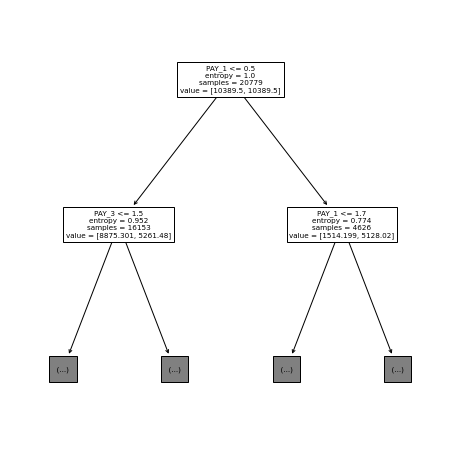

In [69]:
plt.figure(figsize=(8,8))
plot_tree(pipeline.named_steps.model,max_depth=1,feature_names=X_train.columns)
plt.show()

In [70]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(pipeline.named_steps.model,
                                feature_names=X_train.columns,filled=True,
                                rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph

In [71]:
print(tree.export_text(pipeline.named_steps.model,feature_names=X_train.columns.tolist()))

|--- PAY_1 <= 0.50
|   |--- PAY_3 <= 1.50
|   |   |--- PAY_AMT1 <= 1983.50
|   |   |   |--- PAY_2 <= 0.50
|   |   |   |   |--- PAY_AMT3 <= 395.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_AMT3 >  395.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- PAY_2 >  0.50
|   |   |   |   |--- PAY_AMT6 <= 9750.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- PAY_AMT6 >  9750.00
|   |   |   |   |   |--- class: 0
|   |   |--- PAY_AMT1 >  1983.50
|   |   |   |--- LIMIT_BAL <= 145000.00
|   |   |   |   |--- PAY_5 <= 1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_5 >  1.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- LIMIT_BAL >  145000.00
|   |   |   |   |--- BILL_AMT2 <= 219376.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BILL_AMT2 >  219376.00
|   |   |   |   |   |--- class: 0
|   |--- PAY_3 >  1.50
|   |   |--- PAY_5 <= 1.00
|   |   |   |--- PAY_AMT4 <= 804.00
|   |   |   |   |--- BILL_AMT5 <= 19996.50
|   |   |   |   |   |--- clas

**Feature Importances**

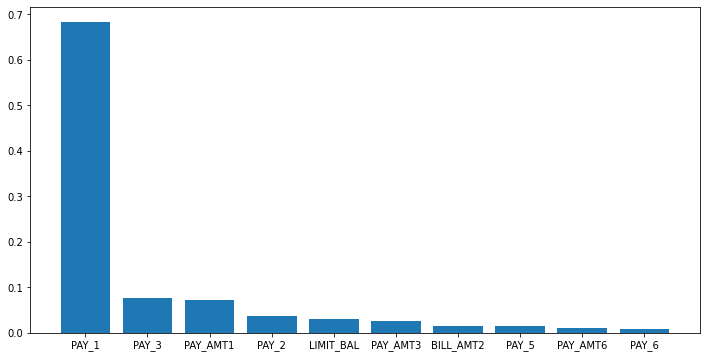

In [72]:
feat_imp_ = pd.DataFrame({'feature':X_train.columns,
                          'value':[i for i in pipeline.named_steps.model.feature_importances_]}).sort_values(by='value',ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,6))
plt.bar(feat_imp_.iloc[:10,0],feat_imp_.iloc[:10,1])
plt.show()

# Bagging - Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
imp = KNNImputer()
rf = RandomForestClassifier(random_state=42,n_jobs=-1,verbose=2,oob_score=True)
pipeline = Pipeline([('impute',imp),('model',rf)])
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100building tree 29 of 100


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100building tree 36 of 100

building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s


building tree 38 of 100building tree 39 of 100

building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100building tree 44 of 100

building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished


Pipeline(steps=[('impute', KNNImputer()),
                ('model',
                 RandomForestClassifier(n_jobs=-1, oob_score=True,
                                        random_state=42, verbose=2))])

In [75]:
pipeline.named_steps.model.oob_score_

0.8093267240964436

In [76]:
pred_test6 = pipeline.predict(X_test)
Scores(y_test, pred_test6)

Accuracy	:  0.8133842353469571
Precision	:  0.6333622936576889
Recall		:  0.3702386998476384
F1 Score	:  0.4673076923076923


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Predicted,0,1,All
Actual,,,
0,6515,422,6937
1,1240,729,1969
All,7755,1151,8906


In [77]:
# feat_imp_ = pd.DataFrame({'feature':X_train.columns,
#                           'value':[i for i in pipeline.named_steps.model.feature_importances_]}).sort_values(by='value',ascending=False).reset_index(drop=True)
# plt.figure(figsize=(12,6))
# plt.barh(feat_imp_.iloc[:,0],feat_imp_.iloc[:,1])
# plt.show()

## GridSearch

In [78]:
imp = KNNImputer()
rf = RandomForestClassifier(random_state=42,n_jobs=-1,verbose=2,oob_score=True)
pipeline = Pipeline([('impute',imp),('model',rf)])

In [79]:
param = {
         'model__criterion':["entropy"],
         'model__max_features':range(3,X_train.shape[1]-2),
         'model__class_weight':['balanced'],
         'model__max_depth':range(3,12,2)}

In [80]:
# clf = GridSearchCV(pipeline,param,scoring='f1',cv=3,verbose=2)
# clf.fit(X_train, y_train)

In [81]:
# clf.best_params_

In [82]:
# clf.best_score_

In [83]:
bestPara = {'model__class_weight': 'balanced',
 'model__criterion': 'entropy',
 'model__max_depth': 7,
 'model__max_features': 5}
bestScore = 0.5392482889262181

In [84]:
# l1 = []
# for i in range(50,900,50):
#     imp = KNNImputer()
#     rf = RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1,verbose=2,oob_score=True,class_weight='balanced',
#                             criterion='entropy',max_depth=7,max_features=5)
#     pipeline = Pipeline([('impute',imp),('model',rf)])
#     pipeline.fit(X_train, y_train)
#     l1.append(pipeline.named_steps.model.oob_score_)

**Fitting**

In [85]:
imp = KNNImputer()
rf = RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1,verbose=2,oob_score=True,class_weight='balanced',
                            criterion='entropy',max_depth=7,max_features=5)
pipeline = Pipeline([('impute',imp),('model',rf)])
pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300building tree 28 of 300

building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.4s


building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300building tree 50 of 300

building tree 51 of 300
building tree 52 of 300
building tree 53 of 300building tree 54 of 300

building tree 55 of 300
building tree 56 of 300
building tree 57 of 300building tree 58 of 300

building tree 59 of 300building tree 60 of 300

building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300building tree 66 of 300

building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    2.2s


building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300building tree 169 of 300

building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300building tree 202 of 300



[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.6s finished


Pipeline(steps=[('impute', KNNImputer()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=7,
                                        max_features=5, n_estimators=300,
                                        n_jobs=-1, oob_score=True,
                                        random_state=42, verbose=2))])

In [86]:
pipeline.named_steps.model.oob_score_

0.7691900476442562

In [87]:
pred_test7 = pipeline.predict(X_test)
Scores(y_test, pred_test7)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.2s finished


Accuracy	:  0.7695935324500337
Precision	:  0.4832051800890328
Recall		:  0.6063991874047739
F1 Score	:  0.5378378378378379


Predicted,0,1,All
Actual,,,
0,5660,1277,6937
1,775,1194,1969
All,6435,2471,8906


In [88]:
Store('RF',0.5378378378378379,0.7695935324500337)

# Bagging Classifier with LR

In [89]:
from sklearn.ensemble import BaggingClassifier

In [90]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
lr = LogisticRegression(C=0.001, solver='liblinear',penalty='l2',random_state = 42)
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',lr)])

In [91]:
Bag = BaggingClassifier(pipeline,n_estimators=25,n_jobs=-5,oob_score=True,verbose=2,random_state=42)

In [92]:
Bag.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.3min finished


BaggingClassifier(base_estimator=Pipeline(steps=[('impute', KNNImputer()),
                                                 ('scaler', RobustScaler()),
                                                 ('transformer',
                                                  PowerTransformer()),
                                                 ('model',
                                                  LogisticRegression(C=0.001,
                                                                     random_state=42,
                                                                     solver='liblinear'))]),
                  n_estimators=25, n_jobs=-5, oob_score=True, random_state=42,
                  verbose=2)

In [93]:
test_pred = Bag.predict(X_test)
Scores(y_test,test_pred)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   27.1s finished


Accuracy	:  0.8024927015495171
Precision	:  0.6586102719033232
Recall		:  0.22143219908583037
F1 Score	:  0.3314329152413531


Predicted,0,1,All
Actual,,,
0,6711,226,6937
1,1533,436,1969
All,8244,662,8906


In [94]:
Store('BAG_LR',0.3314329152413531,0.8024927015495171)

# Bagging Classifier with QDA

In [95]:
imp = KNNImputer()
scale = RobustScaler()
transform = PowerTransformer(method='yeo-johnson')
qda = QuadraticDiscriminantAnalysis()
pipeline = Pipeline([('impute',imp),('scaler',scale),('transformer',transform),('model',qda)])

In [96]:
Bag = BaggingClassifier(pipeline,n_estimators=25,n_jobs=-5,oob_score=True,verbose=2,random_state=42)

In [97]:
Bag.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.2min finished


BaggingClassifier(base_estimator=Pipeline(steps=[('impute', KNNImputer()),
                                                 ('scaler', RobustScaler()),
                                                 ('transformer',
                                                  PowerTransformer()),
                                                 ('model',
                                                  QuadraticDiscriminantAnalysis())]),
                  n_estimators=25, n_jobs=-5, oob_score=True, random_state=42,
                  verbose=2)

In [98]:
test_pred = Bag.predict(X_test)
Scores(y_test,test_pred)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy	:  0.7048057489333034
Precision	:  0.39776951672862454
Recall		:  0.6521076688674454
F1 Score	:  0.49413122955551275


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   27.0s finished


Predicted,0,1,All
Actual,,,
0,4993,1944,6937
1,685,1284,1969
All,5678,3228,8906


In [99]:
Store('BAG_QDA',0.49413122955551275,0.7048057489333034)

# Boosting - Adaboost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
imp = KNNImputer()
ada = AdaBoostClassifier(random_state=42)
pipeline = Pipeline([('impute',imp),('model',ada)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()),
                ('model', AdaBoostClassifier(random_state=42))])

In [102]:
pred_test7 = pipeline.predict(X_test)
Scores(y_test, pred_test7)

Accuracy	:  0.8137210869077026
Precision	:  0.6681127982646421
Recall		:  0.3128491620111732
F1 Score	:  0.4261501210653753


Predicted,0,1,All
Actual,,,
0,6631,306,6937
1,1353,616,1969
All,7984,922,8906


## GridSearch

In [103]:
imp = KNNImputer()
ada = AdaBoostClassifier(random_state=42,algorithm='SAMME')
pipeline = Pipeline([('impute',imp),('model',ada)])

In [104]:
param = {'model__n_estimators': range(5,60,10),
         'model__learning_rate' : [0.01,0.05,0.1,0.3,1,0.001]}

In [106]:
# clf = GridSearchCV(pipeline,param,scoring='f1',cv=3,verbose=2)
# clf.fit(X_train, y_train)

In [ ]:
# clf.best_params_

In [ ]:
# clf.best_score_

**Fitting**

In [107]:
imp = KNNImputer()
ada = AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=50,random_state=42)
pipeline = Pipeline([('impute',imp),('model',ada)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=1,
                                    random_state=42))])

In [108]:
pred_test7 = pipeline.predict(X_test)
Scores(y_test, pred_test7)

Accuracy	:  0.8174264540759039
Precision	:  0.6818663838812301
Recall		:  0.3265617064499746
F1 Score	:  0.44162087912087916


Predicted,0,1,All
Actual,,,
0,6637,300,6937
1,1326,643,1969
All,7963,943,8906


In [109]:
Store('AdaBoost',0.44162087912087916,0.8174264540759039)

### Fitting with best DT

In [110]:
imp = KNNImputer()
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced',
                            criterion='entropy',max_depth=5,
                            splitter='best',min_samples_split= 38)
ada = AdaBoostClassifier(dt,random_state=42)
pipeline = Pipeline([('impute',imp),('model',ada)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()),
                ('model',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                          criterion='entropy',
                                                                          max_depth=5,
                                                                          min_samples_split=38,
                                                                          random_state=42),
                                    random_state=42))])

In [111]:
pred_test7 = pipeline.predict(X_test)
Scores(y_test, pred_test7)

Accuracy	:  0.7126656186840332
Precision	:  0.3991108071135431
Recall		:  0.5926866429659726
F1 Score	:  0.47700797057020233


Predicted,0,1,All
Actual,,,
0,5180,1757,6937
1,802,1167,1969
All,5982,2924,8906


In [112]:
Store('AdaBoost_Best_DT',0.47700797057020233,0.7126656186840332)

# Gradient Boosting

In [113]:
from xgboost import XGBClassifier

In [114]:
imp = KNNImputer()
xgb = XGBClassifier(random_state=42,use_label_encoder=False)
pipeline = Pipeline([('impute',imp),('model',xgb)])
pipeline.fit(X_train, y_train)

[20:27:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('impute', KNNImputer()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [115]:
pred_test8 = pipeline.predict(X_test)
Scores(y_test, pred_test8)

Accuracy	:  0.8096788681787559
Precision	:  0.6208112874779541
Recall		:  0.3575418994413408
F1 Score	:  0.45375443119561715


Predicted,0,1,All
Actual,,,
0,6507,430,6937
1,1265,704,1969
All,7772,1134,8906


**Feature Importance**

In [116]:
pipeline.named_steps.model.feature_importances_

array([0.0231364 , 0.01885973, 0.0203193 , 0.0191183 , 0.01979126,
       0.28002036, 0.19093566, 0.04772214, 0.03579537, 0.03622613,
       0.03714684, 0.0252085 , 0.02314818, 0.02223803, 0.02127219,
       0.01958692, 0.02117759, 0.02303665, 0.02752865, 0.02474135,
       0.02117956, 0.02001403, 0.02179687], dtype=float32)

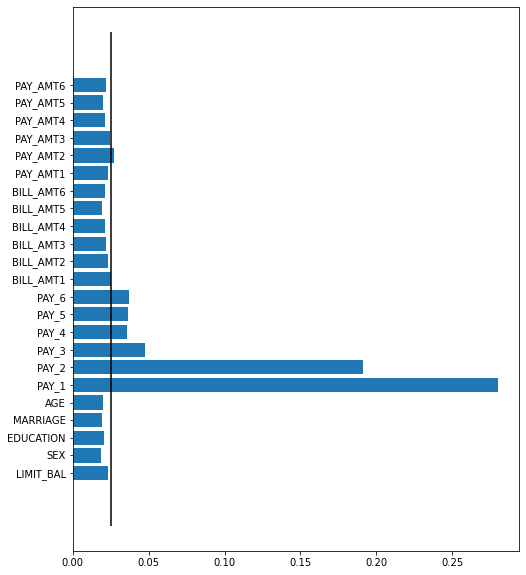

In [117]:
plt.figure(figsize=(8,10))
plt.barh(X_train.columns,pipeline.named_steps.model.feature_importances_)
plt.vlines(0.025,-3,25,colors='black')
plt.show()

## GridSearch

In [ ]:
# imp = KNNImputer()
# xgb = XGBClassifier(random_state=42,use_label_encoder=False)
# pipeline = Pipeline([('impute',imp),('model',xgb)])

# param = {'model__n_estimators': [20, 50, 100, 150, 200],
#          'model__max_depth' : [2, 4, 6, 8],
#          'model__learning_rate' : [0.0001, 0.001, 0.01, 0.1],
#          'model__subsample':[0.5, 0.75, 1.0]}

# clf = GridSearchCV(pipeline,param,scoring='f1',cv=3,verbose=1)
# clf.fit(X_train, y_train)

In [ ]:
best_par = {'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 200,
 'model__subsample': 0.5}
best_sco = 0.46178105795278795

**Fitting**

In [118]:
imp = KNNImputer()
xgb = XGBClassifier(random_state=42,use_label_encoder=False,learning_rate=0.1, max_depth=4,n_estimators=200,
                    subsample=0.5)
pipeline = Pipeline([('impute',imp),('model',xgb)])
pipeline.fit(X_train, y_train)

[20:27:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('impute', KNNImputer()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.5, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [119]:
pred_test8 = pipeline.predict(X_test)
Scores(y_test, pred_test8)

Accuracy	:  0.8176510217830676
Precision	:  0.6586936522539099
Recall		:  0.36363636363636365
F1 Score	:  0.46858638743455494


Predicted,0,1,All
Actual,,,
0,6566,371,6937
1,1253,716,1969
All,7819,1087,8906


In [120]:
Store('XGB',0.46858638743455494,0.8176510217830676)

# SVM

In [124]:
# imp = KNNImputer()
# svc = SVC(random_state=42)
# pipeline = Pipeline([('impute',imp),('model',svc)])

# param = {'model__C':[0.001, 0.01, 0.1, 1, 10],
#          'model__gamma' : [0.001, 0.01, 0.1, 1, 10]}

# clf = GridSearchCV(pipeline,param,scoring='f1',cv=3,verbose=1)
# clf.fit(X_train, y_train)

**Fitting**

In [ ]:
# imp = KNNImputer()
# svc = SVC(random_state=42,C=5000)
# pipeline = Pipeline([('impute',imp),('model',svc)])
# pipeline.fit(X_train, y_train)

In [ ]:
# pred_test9 = pipeline.predict(X_test)
# Scores(y_test, pred_test9)

# Model Comparison

In [63]:
pd.DataFrame(model_perf,index=['F1','Accuracy']).T

,F1,Accuracy
LR,0.327078,0.802717
KNN,0.420564,0.789917
LDA,0.333838,0.802380
QDA,0.488718,0.687065
DT,0.524128,0.776331
RF,0.537838,0.769594
BAG_LR,0.331433,0.802493
BAG_QDA,0.494131,0.704806
AdaBoost,0.441621,0.817426
AdaBoost_Best_DT,0.477008,0.712666
